In [1]:
import pandas as pd
import numpy as np

In [2]:
df_17=pd.read_csv('/content/BTC-2017min.csv')
df_18=pd.read_csv('/content/BTC-2018min.csv')
df_19=pd.read_csv('/content/BTC-2019min.csv')
df_20=pd.read_csv('/content/BTC-2020min.csv')
df_21=pd.read_csv('/content/BTC-2021min.csv')

In [3]:
df_21.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [4]:
df = pd.concat([df_17, df_18, df_19, df_20, df_21], ignore_index=True)

In [5]:
df.isna().sum()

,0
unix,0
date,1
symbol,2
open,4
high,4
low,4
close,5
Volume BTC,5
Volume USD,5


In [6]:
# # prompt: in date make two columns date and time and separate date and time

# df[['Date', 'Time']] = df['date'].str.split(' ', expand=True)
# df.head()

In [7]:
# prompt: drop unix and symbol columns

df = df.drop(['unix', 'symbol'], axis=1)
df.head()

,date,open,high,low,close,Volume BTC,Volume USD
0,2017-12-31 23:59:00,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
1,2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2,2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
3,2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
4,2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


<Axes: xlabel='date'>

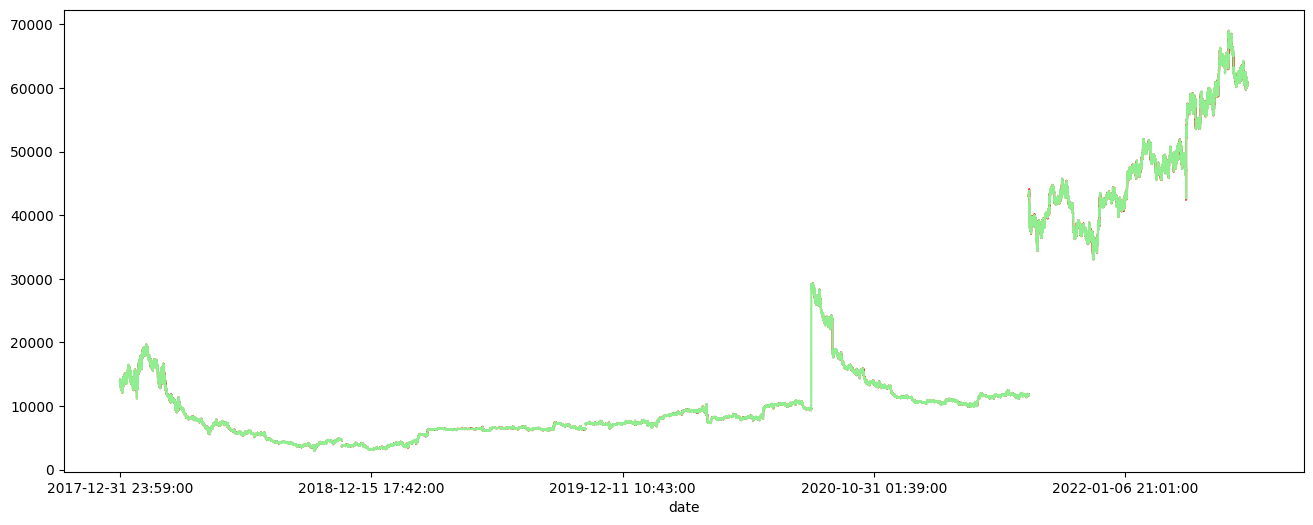

In [8]:

# prompt: take index col as last
df = df.set_index('date')
df['close'].plot(figsize=(16,6), color='red')
df['open'].plot(figsize=(16,6), color='lightgreen')


Different approaches like LSTM can be followed but after further research in the topic it can be seen that such models cannot be trained for highly variable datset as they are highly dependent on short term memory. LSTM uses past memory for predicting future points and gives high weightage to time stanps thus generating predictions giving higher weight to nearest values.

while the time component adds additional information, it also makes time series problems more difficult to handle compared to many other prediction tasks.

In [9]:

# from statsmodels.tsa.stattools import adfuller

# # Calculate the difference between consecutive close prices
# df_17['close_diff'] = df_17['close'].diff()
# # Drop the first row which will have NaN due to differencing
# df_17 = df_17.dropna(subset=['close_diff'])
# # Apply the ADF test
# result = adfuller(df_17['close_diff'])
# # Print the results
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
#     print('\t%s: %.3f' % (key, value))


Using time differencing check if stationery or random walk. Use p value for this

In [10]:
df.isna().sum()

,0
open,4
high,4
low,4
close,5
Volume BTC,5
Volume USD,5


In [11]:
from statsmodels.tsa.stattools import adfuller

# Subset the first 10,000 rows
df_subset = df_17.head(50000)

# Drop NA values in the 'close' column before applying the ADF test
df_subset = df_subset.dropna(subset=['close'])

# Apply the ADF test to the 'close' column
result = adfuller(df_subset['close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation
if result[1] < 0.05:
    print("Reject the null hypothesis - the series is likely stationary.")
else:
    print("Fail to reject the null hypothesis - the series is likely non-stationary.")


ADF Statistic: -0.9446501900002033
p-value: 0.7729132325401094
Critical Values: {'1%': -3.430480826731732, '5%': -2.8615978227282706, '10%': -2.566800777125945}
Fail to reject the null hypothesis - the series is likely non-stationary.


0.7729132325401094 - The p-value represents the probability of observing the data if the null hypothesis (that the series is non-stationary) is true. In this case, the p-value is much higher than the typical significance level of 0.05.
This means that the series present in the problem is nonstationery.


To reject the null hypothesis (which means the series is non-stationary), the ADF statistic must be lower than these critical values.


A stationary time series has consistent statistical properties such as mean, variance, and covariance over time. Many time series forecasting models assume that the series is stationary because it makes predictions more reliable.

Why is Stationarity Important?

Stationary Time Series: The series has constant properties over time, making it easier to forecast.

Non-Stationary Time Series: This has trends, seasonality, or other changes over time that violate these assumptions, meaning predictions may become less accurate if the time series is non-stationary.

**Outcome:** **Use means to make data stationery if ARIMA is to be used**

In [12]:
from statsmodels.tsa.stattools import adfuller

# Subset the first 10,000 rows
df_subset = df_18.head(50000)

# Drop NA values in the 'close' column before applying the ADF test
df_subset = df_subset.dropna(subset=['close'])

# Apply the ADF test to the 'close' column
result = adfuller(df_subset['close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation
if result[1] < 0.05:
    print("Reject the null hypothesis - the series is likely stationary.")
else:
    print("Fail to reject the null hypothesis - the series is likely non-stationary.")


ADF Statistic: -1.8118200189455287
p-value: 0.37460937343125966
Critical Values: {'1%': -3.430480855528914, '5%': -2.8615978354557527, '10%': -2.566800783900412}
Fail to reject the null hypothesis - the series is likely non-stationary.


In [13]:
from statsmodels.tsa.stattools import adfuller


df_subset = df_19.head(50000)

# Drop NA values in the 'close' column before applying the ADF test
df_subset = df_subset.dropna(subset=['close'])

# Apply the ADF test to the 'close' column
result = adfuller(df_subset['close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("Reject the null hypothesis - the series is likely stationary.")
else:
    print("Fail to reject the null hypothesis - the series is likely non-stationary.")


ADF Statistic: -2.782974356492417
p-value: 0.06074721667793191
Critical Values: {'1%': -3.430480897438363, '5%': -2.8615978539784597, '10%': -2.566800793759507}
Fail to reject the null hypothesis - the series is likely non-stationary.


In [14]:
from statsmodels.tsa.stattools import adfuller

# Subset the first 10,000 rows
df_subset = df_20.head(50000)

# Drop NA values in the 'close' column before applying the ADF test
df_subset = df_subset.dropna(subset=['close'])

# Apply the ADF test to the 'close' column
result = adfuller(df_subset['close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation
if result[1] < 0.05:
    print("Reject the null hypothesis - the series is likely stationary.")
else:
    print("Fail to reject the null hypothesis - the series is likely non-stationary.")


ADF Statistic: -1.7576265505445243
p-value: 0.4016924444131835
Critical Values: {'1%': -3.430480813646293, '5%': -2.861597816944903, '10%': -2.5668007740476275}
Fail to reject the null hypothesis - the series is likely non-stationary.


In [15]:
from statsmodels.tsa.stattools import adfuller

# Subset the first 10,000 rows
df_subset = df_21.head(50000)

# Drop NA values in the 'close' column before applying the ADF test
df_subset = df_subset.dropna(subset=['close'])

# Apply the ADF test to the 'close' column
result = adfuller(df_subset['close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation
if result[1] < 0.05:
    print("Reject the null hypothesis - the series is likely stationary.")
else:
    print("Fail to reject the null hypothesis - the series is likely non-stationary.")


ADF Statistic: -1.6547448120010093
p-value: 0.45456705438618406
Critical Values: {'1%': -3.430480921024227, '5%': -2.861597864402697, '10%': -2.566800799308024}
Fail to reject the null hypothesis - the series is likely non-stationary.


Since the series is non-stationary, you may need to transform or preprocess your data before applying models that assume stationarity, such as differencing the series:



In [16]:
df_17['close_diff'] = df_17['close'].diff().dropna()
df_18['close_diff'] = df_18['close'].diff().dropna()
df_19['close_diff'] = df_19['close'].diff().dropna()
df_20['close_diff'] = df_20['close'].diff().dropna()
df_21['close_diff'] = df_21['close'].diff().dropna()

In [17]:
df_17.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,close_diff
0,1514764740,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549,NaN
1,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658,73.77
2,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294,-40.51
3,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134,-53.68
4,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,-34.53


In [18]:
from statsmodels.tsa.stattools import adfuller

# Subset the first 10,000 rows
df_subset = df_17.head(50000)

# Drop NA values in the 'close' column before applying the ADF test
df_subset = df_subset.dropna(subset=['close'])

# Apply the ADF test to the 'close' column
result = adfuller(df_subset['close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation
if result[1] < 0.05:
    print("Reject the null hypothesis - the series is likely stationary.")
else:
    print("Fail to reject the null hypothesis - the series is likely non-stationary.")


ADF Statistic: -0.9446501900002033
p-value: 0.7729132325401094
Critical Values: {'1%': -3.430480826731732, '5%': -2.8615978227282706, '10%': -2.566800777125945}
Fail to reject the null hypothesis - the series is likely non-stationary.


In [19]:
from statsmodels.tsa.stattools import adfuller

# Subset the first 10,000 rows
df_subset = df_18.head(50000)

# Drop NA values in the 'close' column before applying the ADF test
df_subset = df_subset.dropna(subset=['close'])

# Apply the ADF test to the 'close' column
result = adfuller(df_subset['close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation
if result[1] < 0.05:
    print("Reject the null hypothesis - the series is likely stationary.")
else:
    print("Fail to reject the null hypothesis - the series is likely non-stationary.")


ADF Statistic: -1.8118200189455287
p-value: 0.37460937343125966
Critical Values: {'1%': -3.430480855528914, '5%': -2.8615978354557527, '10%': -2.566800783900412}
Fail to reject the null hypothesis - the series is likely non-stationary.


In [20]:
from statsmodels.tsa.stattools import adfuller

# Subset the first 10,000 rows
df_subset = df_19.head(50000)

# Drop NA values in the 'close' column before applying the ADF test
df_subset = df_subset.dropna(subset=['close'])

# Apply the ADF test to the 'close' column
result = adfuller(df_subset['close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation
if result[1] < 0.05:
    print("Reject the null hypothesis - the series is likely stationary.")
else:
    print("Fail to reject the null hypothesis - the series is likely non-stationary.")


ADF Statistic: -2.782974356492417
p-value: 0.06074721667793191
Critical Values: {'1%': -3.430480897438363, '5%': -2.8615978539784597, '10%': -2.566800793759507}
Fail to reject the null hypothesis - the series is likely non-stationary.


In [21]:
from statsmodels.tsa.stattools import adfuller

# Subset the first 10,000 rows
df_subset = df_20.head(50000)

# Drop NA values in the 'close' column before applying the ADF test
df_subset = df_subset.dropna(subset=['close'])

# Apply the ADF test to the 'close' column
result = adfuller(df_subset['close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation
if result[1] < 0.05:
    print("Reject the null hypothesis - the series is likely stationary.")
else:
    print("Fail to reject the null hypothesis - the series is likely non-stationary.")


ADF Statistic: -1.7576265505445243
p-value: 0.4016924444131835
Critical Values: {'1%': -3.430480813646293, '5%': -2.861597816944903, '10%': -2.5668007740476275}
Fail to reject the null hypothesis - the series is likely non-stationary.


In [22]:
from statsmodels.tsa.stattools import adfuller

# Subset the first 10,000 rows
df_subset = df_21.head(50000)

# Drop NA values in the 'close' column before applying the ADF test
df_subset = df_subset.dropna(subset=['close'])

# Apply the ADF test to the 'close' column
result = adfuller(df_subset['close'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation
if result[1] < 0.05:
    print("Reject the null hypothesis - the series is likely stationary.")
else:
    print("Fail to reject the null hypothesis - the series is likely non-stationary.")


ADF Statistic: -1.6547448120010093
p-value: 0.45456705438618406
Critical Values: {'1%': -3.430480921024227, '5%': -2.861597864402697, '10%': -2.566800799308024}
Fail to reject the null hypothesis - the series is likely non-stationary.


Comparative Analysis
No Change After Differencing: The ADF test results for all subsets remain consistent before and after differencing. This indicates that differencing alone has not made the series stationary.

Possible Issues:

Insufficient Differencing: A single differencing may not be enough to make the series stationary. You might need additional differencing or other transformations (e.g., log transformation, seasonal differencing).
Complex Non-Stationarity: The non-stationarity might be due to complex trends or seasonality that a simple differencing cannot address.
Recommendations
Further Differencing: Try applying a second differencing (i.e., differencing the differenced series) and reapply the ADF test.

Explore Transformations: Consider transformations like log or seasonal differencing if you suspect non-stationarity is due to trends or seasonality.

Visual Inspection: Plot the series and its differenced version to visually inspect any trends or patterns that might help in further transformations.

In [23]:
import pandas as pd

def seasonal_difference(data, period):
    # Check for 'close' column
    if 'close' not in data.columns:
        raise ValueError("'close' column is missing from the dataframe.")

    # Apply seasonal differencing
    data['seasonal_diff'] = data['close'] - data['close'].shift(period)
    return data['seasonal_diff'].dropna()

# Example: Seasonal differencing with a daily period (1440 minutes)
df_17['seasonal_diff'] = seasonal_difference(df_17, 1440)
df_18['seasonal_diff'] = seasonal_difference(df_18, 1440)
df_19['seasonal_diff'] = seasonal_difference(df_19, 1440)
df_20['seasonal_diff'] = seasonal_difference(df_20, 1440)
df_21['seasonal_diff'] = seasonal_difference(df_21, 1440)

In [24]:
df_17

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,close_diff,seasonal_diff
0,1514764740,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549,NaN,NaN
1,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658,73.77,NaN
2,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294,-40.51,NaN
3,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134,-53.68,NaN
4,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,-34.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176578,1504170060,2017-08-31 09:01:00,BTC/USD,4610.73,4613.00,4607.00,4613.00,2.026579,9348.608558,3.00,-173.36
176579,1504170000,2017-08-31 09:00:00,BTC/USD,4610.73,4610.74,4607.00,4610.73,2.166049,9987.067613,-2.27,-175.63
176580,1504169940,2017-08-31 08:59:00,BTC/USD,4615.89,4615.89,4613.47,4613.47,0.002390,11.024763,2.74,-172.17
176581,1504169880,2017-08-31 08:58:00,BTC/USD,4607.20,4616.85,4607.20,4607.47,5.660321,26079.757493,-6.00,-178.87


First 24 values show nan values as we calculate on 24 hours

In [25]:

# Apply ADF test on the seasonal differenced data
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(data, column_name, name):
    result = adfuller(data[column_name].dropna())
    print(f'ADF Test Results for {name} (Seasonally Differenced):')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] < 0.05:
        print("Reject the null hypothesis - the series is likely stationary.")
    else:
        print("Fail to reject the null hypothesis - the series is likely non-stationary.")
    print('\n')




In [26]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test_on_subset(data, num_rows, name):
    """
    Apply the ADF test on a subset of data.

    Parameters:
    data (pd.DataFrame): DataFrame containing 'close' column.
    num_rows (int): Number of rows to consider from the beginning of the DataFrame.
    name (str): Name to identify the dataset.

    Returns:
    None
    """
    # Subset the data and drop NA values
    df_subset = data.head(num_rows).dropna(subset=['close'])

    # Apply the ADF test to the 'close' column
    result = adfuller(df_subset['close'])

    # Print the results
    print(f'ADF Test Results for {name} (First {num_rows} Rows):')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    # Interpretation
    if result[1] < 0.05:
        print("Reject the null hypothesis - the series is likely stationary.")
    else:
        print("Fail to reject the null hypothesis - the series is likely non-stationary.")
    print('\n')

# Apply the function to the data for the years 2017 to 2021
perform_adf_test_on_subset(df_17, 50000, 'df_17')
perform_adf_test_on_subset(df_18, 50000, 'df_18')
perform_adf_test_on_subset(df_19, 50000, 'df_19')
perform_adf_test_on_subset(df_20, 50000, 'df_20')


ADF Test Results for df_17 (First 50000 Rows):
ADF Statistic: -0.9446501900002033
p-value: 0.7729132325401094
Critical Values: {'1%': -3.430480826731732, '5%': -2.8615978227282706, '10%': -2.566800777125945}
Fail to reject the null hypothesis - the series is likely non-stationary.


ADF Test Results for df_18 (First 50000 Rows):
ADF Statistic: -1.8118200189455287
p-value: 0.37460937343125966
Critical Values: {'1%': -3.430480855528914, '5%': -2.8615978354557527, '10%': -2.566800783900412}
Fail to reject the null hypothesis - the series is likely non-stationary.


ADF Test Results for df_19 (First 50000 Rows):
ADF Statistic: -2.782974356492417
p-value: 0.06074721667793191
Critical Values: {'1%': -3.430480897438363, '5%': -2.8615978539784597, '10%': -2.566800793759507}
Fail to reject the null hypothesis - the series is likely non-stationary.


ADF Test Results for df_20 (First 50000 Rows):
ADF Statistic: -1.7576265505445243
p-value: 0.4016924444131835
Critical Values: {'1%': -3.4304808136

In [27]:
df_17.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,close_diff,seasonal_diff
0,1514764740,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549,NaN,NaN
1,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658,73.77,NaN
2,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294,-40.51,NaN
3,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134,-53.68,NaN
4,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,-34.53,NaN


QUITE CLOSE TO A RANDOM WALK

In [28]:
df.head()

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2017-12-31 23:59:00,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


In [29]:
df

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2017-12-31 23:59:00,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130
...,...,...,...,...,...,...
2021-10-31 09:58:00,60705.15,60705.15,60705.15,60705.15,0.000000,0.000000
2021-10-31 09:57:00,60629.76,60705.15,60629.76,60705.15,0.256277,15557.308230
2021-10-31 09:56:00,60667.23,60667.23,60622.91,60660.00,0.548174,33252.228774


Thus possible approaches to take is to use


1.  Naive approach
2.  Linear Regression as a simple model
3.  Using LSTM multivariate model
4. Arima after ensuring seasonality ie using differences in prices rather than close price of the stock.



**NAIVE APPROACH**

In [30]:
df_naive=df.copy()

# Calculate the difference between consecutive close prices
df_naive['close_diff'] = df_naive['close'].diff()

# Drop the first row which will have NaN due to differencing
df_naive = df_naive.dropna(subset=['close_diff'])


In [31]:
df_naive.isna().sum()

,0
open,0
high,0
low,0
close,0
Volume BTC,0
Volume USD,0
close_diff,0


In [32]:
df_naive.head()

,open,high,low,close,Volume BTC,Volume USD,close_diff
date,,,,,,,
2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658,73.77
2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294,-40.51
2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134,-53.68
2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,-34.53
2017-12-31 23:54:00,13884.14,13884.14,13823.88,13854.28,4.810702,66648.811119,29.23


In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


numerical_cols = ['open', 'high', 'low', 'close', 'Volume USD','Volume BTC']


train_data = df_naive[df_naive.index < '2021']
test_data = df_naive[df_naive.index >= '2021']


scaler = MinMaxScaler()  # or scaler = StandardScaler()

# Fit the scaler on the training data only
scaler.fit(train_data[numerical_cols])

train_data_scaled = train_data.copy()
test_data_scaled = test_data.copy()

train_data_scaled[numerical_cols] = scaler.transform(train_data[numerical_cols])
test_data_scaled[numerical_cols] = scaler.transform(test_data[numerical_cols])

In [34]:
train_data_scaled.head()

,open,high,low,close,Volume BTC,Volume USD,close_diff
date,,,,,,,
2017-12-31 23:58:00,0.415399,0.416883,0.415010,0.416982,0.001209,0.002458,73.77
2017-12-31 23:57:00,0.415226,0.415342,0.414641,0.415443,0.000670,0.001358,-40.51
2017-12-31 23:56:00,0.412121,0.415168,0.412816,0.413403,0.000576,0.001163,-53.68
2017-12-31 23:55:00,0.412047,0.411990,0.412742,0.412092,0.000057,0.000114,-34.53
2017-12-31 23:54:00,0.414292,0.414235,0.412697,0.413202,0.004156,0.008393,29.23


In [35]:
test_data_scaled.head()

,open,high,low,close,Volume BTC,Volume USD,close_diff
date,,,,,,,
2022-03-01 03:41:00,1.521213,1.522337,1.522960,1.522250,0.000124,0.000775,0.00
2022-03-01 03:40:00,1.521365,1.521411,1.522876,1.521090,0.000008,0.000050,-30.55
2022-03-01 03:39:00,1.521856,1.521902,1.522245,1.520459,0.000709,0.004445,-16.59
2022-03-01 03:38:00,1.523477,1.523523,1.524148,1.522360,0.000019,0.000120,50.02
2022-03-01 03:37:00,1.523511,1.524066,1.525261,1.523859,0.001376,0.008645,39.46


**STORING GENRAL TEST AND TRAIN DATA**

In [36]:
general_train_data=train_data_scaled.copy()
general_test_data=test_data_scaled.copy()

In [37]:
train_data_scaled['lag_1'] = train_data_scaled['close'].shift(1)
test_data_scaled['lag_1'] = test_data_scaled['close'].shift(1)

# Drop any rows with NaN values due to shifting
train_data_scaled = train_data_scaled.dropna()
test_data_scaled = test_data_scaled.dropna()

In [38]:
train_data_scaled.head()

,open,high,low,close,Volume BTC,Volume USD,close_diff,lag_1
date,,,,,,,,
2017-12-31 23:57:00,0.415226,0.415342,0.414641,0.415443,0.000670,0.001358,-40.51,0.416982
2017-12-31 23:56:00,0.412121,0.415168,0.412816,0.413403,0.000576,0.001163,-53.68,0.415443
2017-12-31 23:55:00,0.412047,0.411990,0.412742,0.412092,0.000057,0.000114,-34.53,0.413403
2017-12-31 23:54:00,0.414292,0.414235,0.412697,0.413202,0.004156,0.008393,29.23,0.412092
2017-12-31 23:53:00,0.413167,0.414788,0.413343,0.414337,0.009046,0.018306,29.87,0.413202


CLOSE OPEN HIGH LOW ARE HAVING HIGH CORR. ALSO

In [39]:
from sklearn.linear_model import LinearRegression

# Train the model on the lagged data
model = LinearRegression()
model.fit(train_data_scaled[['lag_1']], train_data_scaled['close'])

# Predict on test data
predictions = model.predict(test_data_scaled[['lag_1']])
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data_scaled['close'], predictions)
print(f'MSE: {mse}')


MSE: 3.2665107194556093e-06


In [40]:
# prompt: get rmse and accuracy too

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(test_data_scaled['close'], predictions)
print(f'R-squared: {r_squared}')
tolerance = 0.05
within_tolerance = (abs(test_data_scaled['close'] - predictions) / test_data_scaled['close']) <= tolerance
accuracy = within_tolerance.mean()
print(f'Accuracy (within {tolerance * 100}% tolerance): {accuracy}')


RMSE: 0.001807349086218711
R-squared: 0.9999702831408598
Accuracy (within 5.0% tolerance): 0.9999884968884083


**LSTM APPROACH**

In [41]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

# Example with a sequence length of 60
seq_length = 60
X_train, y_train = create_sequences(train_data_scaled['close'].values, seq_length)
X_test, y_test = create_sequences(test_data_scaled['close'].values, seq_length)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Predict on test data
predictions = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
11301/11301 ━━━━━━━━━━━━━━━━━━━━ 94s 8ms/step - loss: 3.6432e-04
Epoch 2/10
11301/11301 ━━━━━━━━━━━━━━━━━━━━ 88s 8ms/step - loss: 1.9854e-05
Epoch 3/10
11301/11301 ━━━━━━━━━━━━━━━━━━━━ 90s 8ms/step - loss: 1.2528e-05
Epoch 4/10
11301/11301 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step - loss: 1.0461e-05
Epoch 5/10
11301/11301 ━━━━━━━━━━━━━━━━━━━━ 141s 8ms/step - loss: 8.7816e-06
Epoch 6/10
11301/11301 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step - loss: 8.7465e-06
Epoch 7/10
11301/11301 ━━━━━━━━━━━━━━━━━━━━ 141s 8ms/step - loss: 8.2538e-06
Epoch 8/10
11301/11301 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step - loss: 7.1835e-06
Epoch 9/10
11301/11301 ━━━━━━━━━━━━━━━━━━━━ 89s 8ms/step - loss: 9.5526e-06
Epoch 10/10
11301/11301 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step - loss: 5.9167e-06
5432/5432 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step
